Import necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data Collection

In [2]:
df = pd.read_csv('../data/Insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Check the data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

Check for Missing Values & Duplicates

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
duplicate_count = df.duplicated().sum()
print(f"duplicate rows: {duplicate_count}")

duplicate rows: 1


In [5]:
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New shape: {df.shape}")

Duplicates removed. New shape: (1337, 7)


In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
fig = plt.figure(figsize=(20, 25))

<Figure size 2000x2500 with 0 Axes>

### 1. Visualize Distribution of Numerical Features ['age', 'bmi', 'charges']

Age Distribution with Histogram

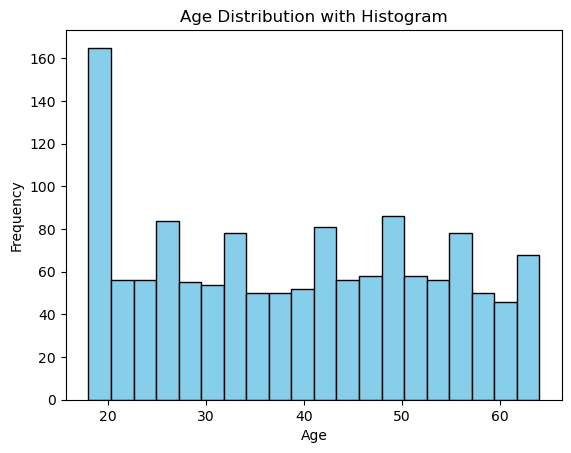

In [ ]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution with Histogram")
plt.show()

Age Distribution with KDE

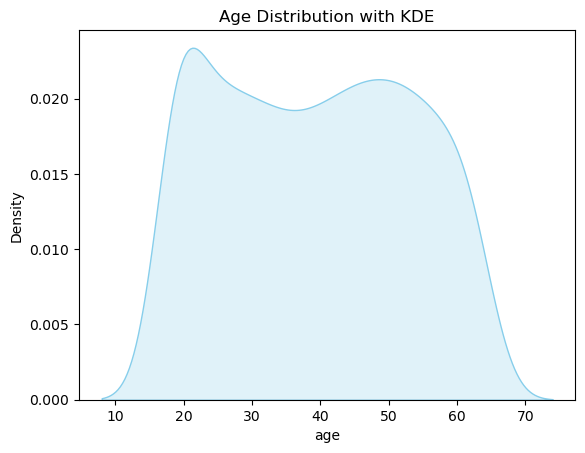

In [ ]:
sns.kdeplot(data=df, x='age', fill=True, color='skyblue')
plt.title("Age Distribution with KDE")
plt.show()

BMI Distribution with Histogram

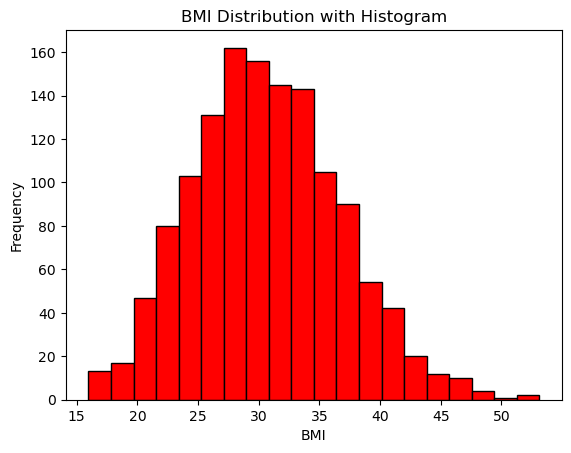

In [31]:
plt.hist(df['bmi'], bins=20, color='red', edgecolor='black')
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("BMI Distribution with Histogram")
plt.show()

BMI Distribution with KDE

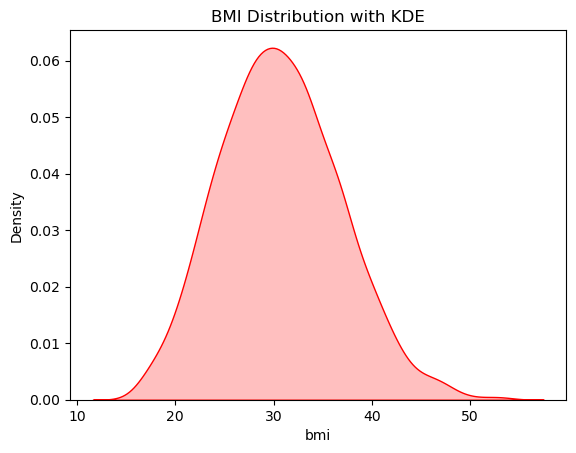

In [34]:
sns.kdeplot(data=df, x='bmi', fill=True, color='red')
plt.title("BMI Distribution with KDE")
plt.show()

Charges Distribution with Histogram

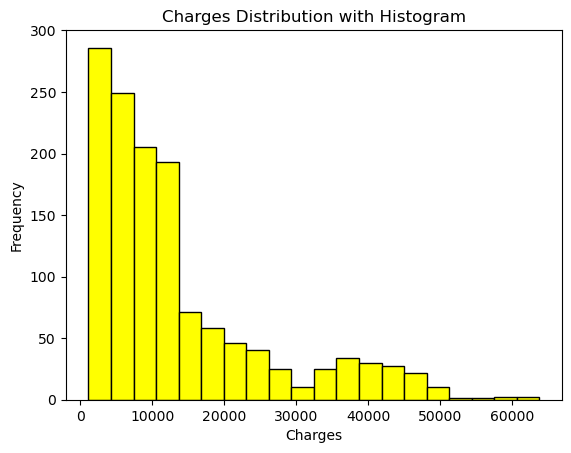

In [33]:
plt.hist(df['charges'], bins=20, color='yellow', edgecolor='black')
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Charges Distribution with Histogram")
plt.show()

Charges Distribution with Histogram

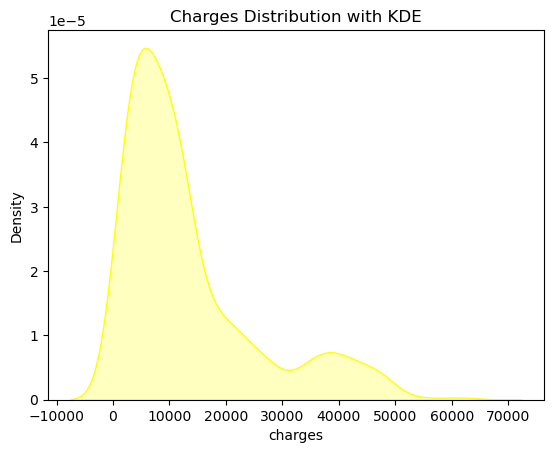

In [35]:
sns.kdeplot(data=df, x='charges', fill=True, color='yellow')
plt.title("Charges Distribution with KDE")
plt.show()

Boxplots to check for outliers for Age

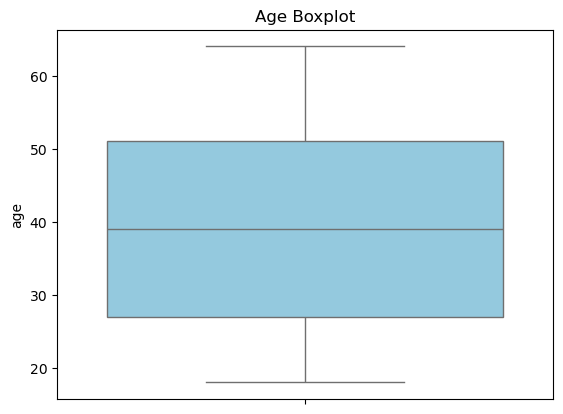

In [52]:
sns.boxplot(y=df['age'], color='skyblue')
plt.title('Age Boxplot')
plt.show()

Boxplots to check for outliers for BMI

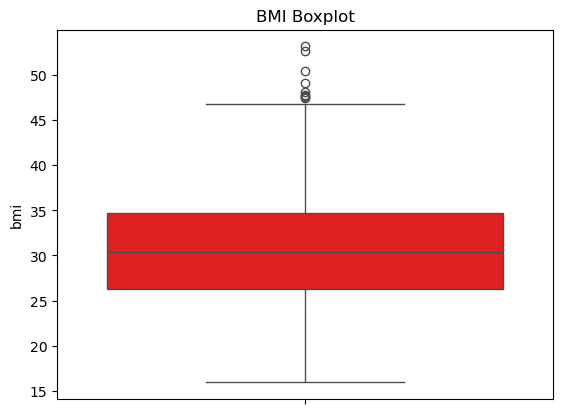

In [41]:
sns.boxplot(data=df,y=df['bmi'], color='red')
plt.title('BMI Boxplot')
plt.show()

Boxplots to check for outliers for Charges

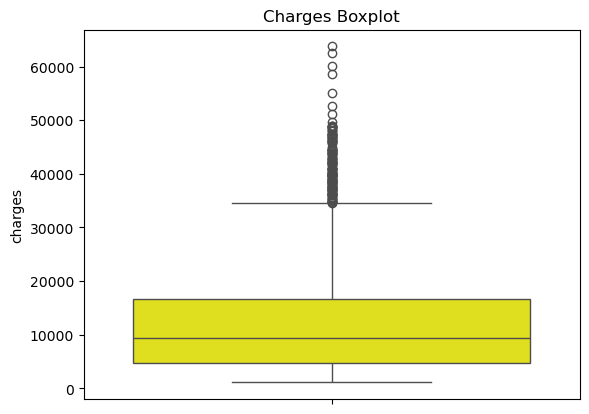

In [42]:
sns.boxplot(data=df,y=df['charges'], color='yellow')
plt.title('Charges Boxplot')
plt.show()

### 2. Visualize Categorical Feature Frequencies ['sex', 'smoker', 'region', 'children']

Sex distribution

In [51]:
sex_counts = df['sex'].value_counts()

sex_counts

sex
male      675
female    662
Name: count, dtype: int64

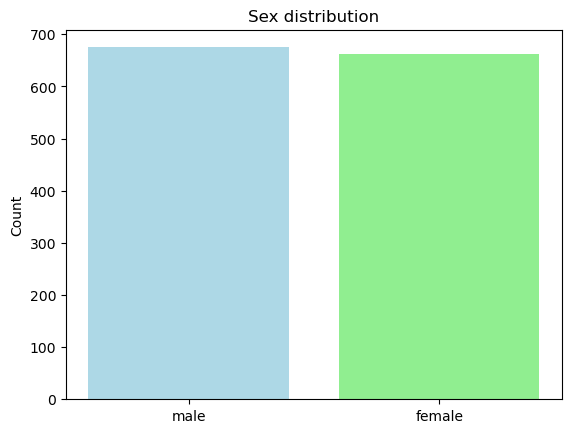

In [68]:
plt.bar(sex_counts.index, sex_counts.values, color=['lightblue', 'lightgreen'])
plt.title("Sex distribution")
plt.ylabel('Count')
plt.show()

Smoker distribution

In [60]:
smoker_counts = df['smoker'].value_counts()
smoker_counts

smoker
no     1063
yes     274
Name: count, dtype: int64

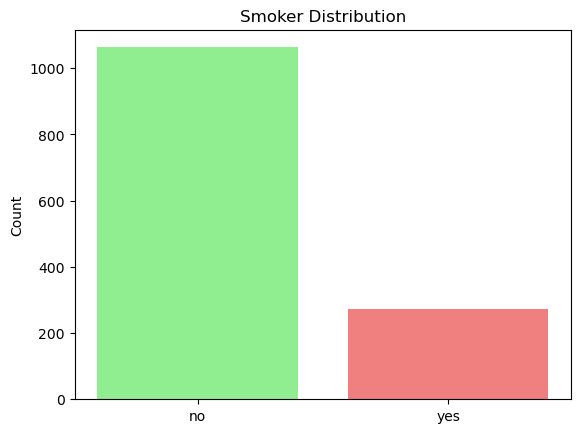

In [69]:
plt.bar(smoker_counts.index, smoker_counts.values, color=['lightgreen', 'lightcoral'])
plt.title('Smoker Distribution')
plt.ylabel('Count')
plt.show()

Region distribution

In [70]:
region_counts = df['region'].value_counts()
region_counts

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

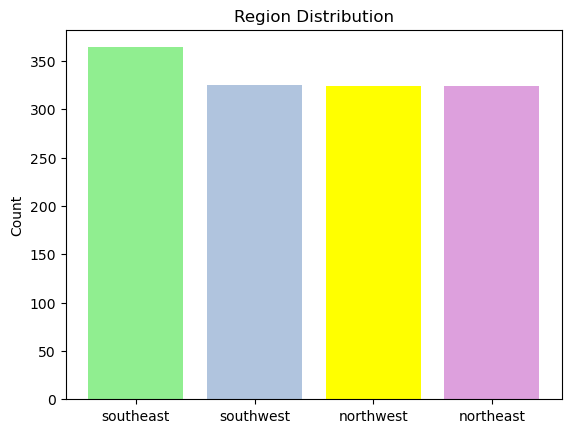

In [77]:
plt.bar(region_counts.index, region_counts.values, color=['lightgreen', 'lightsteelblue', 'yellow', 'plum'])
plt.title('Region Distribution')
plt.ylabel('Count')
plt.show()

Children distribution

In [78]:
children_counts = df['children'].value_counts().sort_index()
children_counts

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

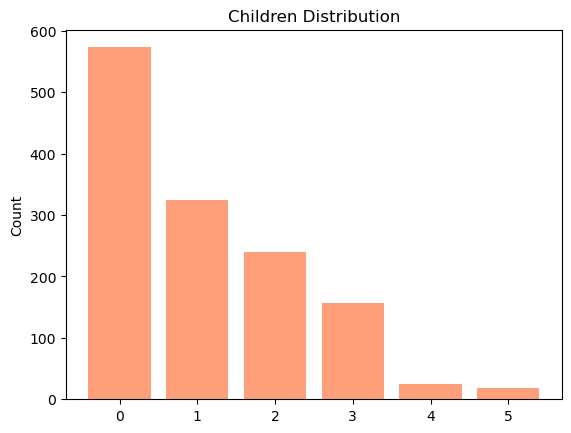

In [79]:
plt.bar(children_counts.index, children_counts.values, color='lightsalmon')
plt.title('Children Distribution')
plt.ylabel('Count')
plt.show()

### 3. Compare Charges Across Categories

Charges by Smoker Status

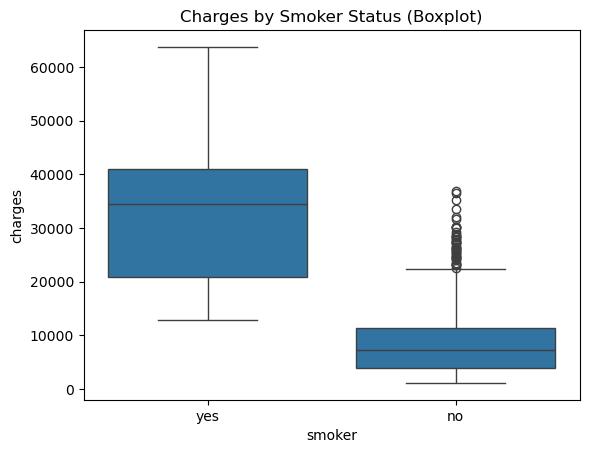

In [85]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoker Status (Boxplot)')
plt.show()

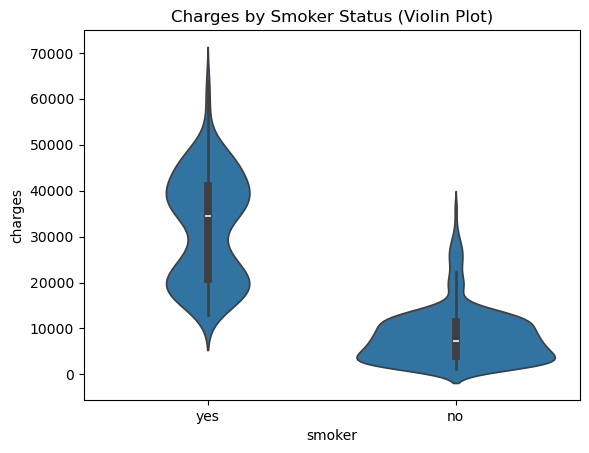

In [89]:
sns.violinplot(data=df, x='smoker', y='charges')
plt.title('Charges by Smoker Status (Violin Plot)')
plt.show()

Charges by Region

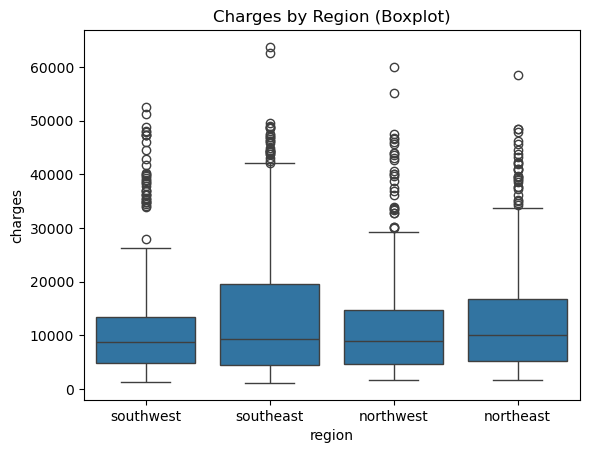

In [86]:
sns.boxplot(data=df, x='region', y='charges')
plt.title('Charges by Region (Boxplot)')
plt.show()

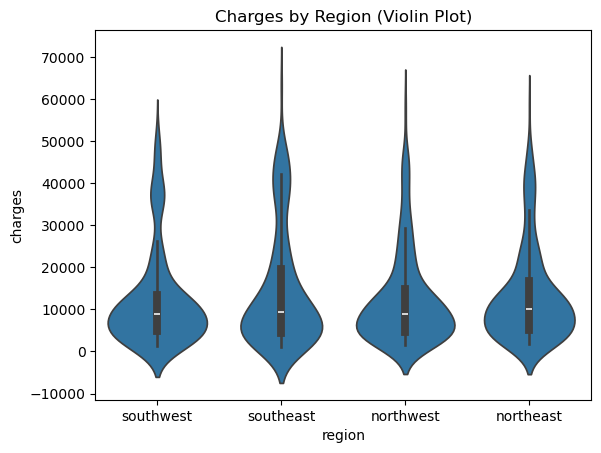

In [90]:
sns.violinplot(data=df, x='region', y='charges')
plt.title('Charges by Region (Violin Plot)')
plt.show()

Charges by Sex

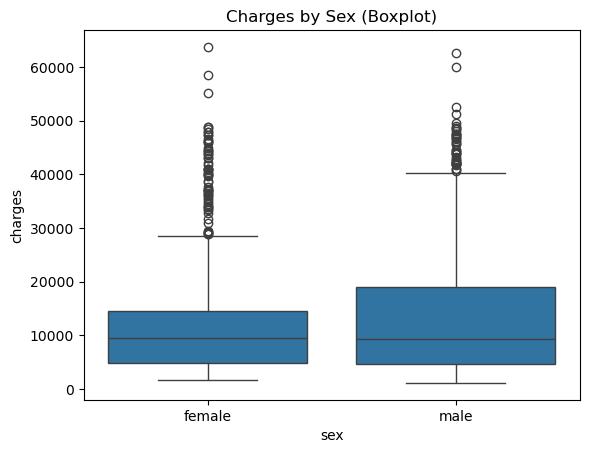

In [87]:
sns.boxplot(data=df, x='sex', y='charges')
plt.title('Charges by Sex (Boxplot)')
plt.show()

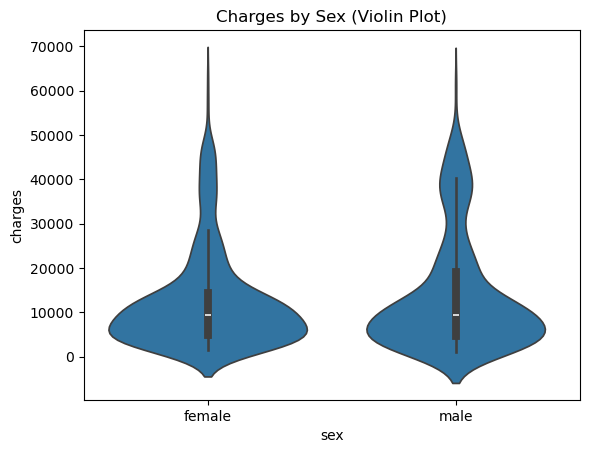

In [91]:
sns.violinplot(data=df, x='sex', y='charges')
plt.title('Charges by Sex (Violin Plot)')
plt.show()

Charges by Childern Count

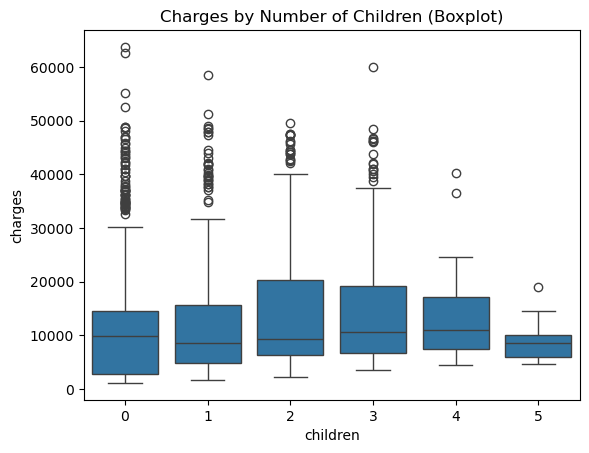

In [88]:
sns.boxplot(data=df, x='children', y='charges')
plt.title('Charges by Number of Children (Boxplot)')
plt.show()

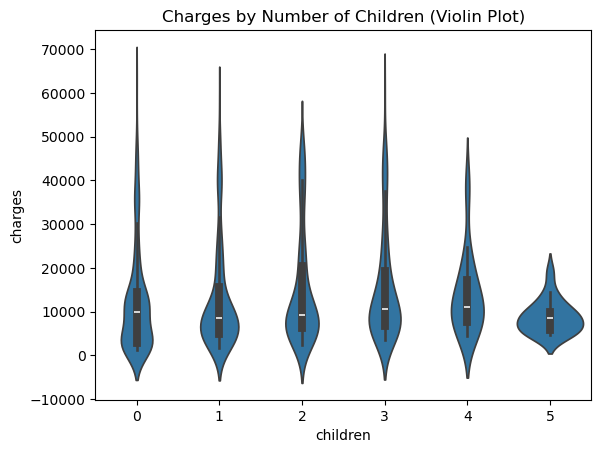

In [92]:
sns.violinplot(data=df, x='children', y='charges')
plt.title('Charges by Number of Children (Violin Plot)')
plt.show()

### 4. Explore Relationships Between Numerical Features

BMI vs Charges by Smoker Status

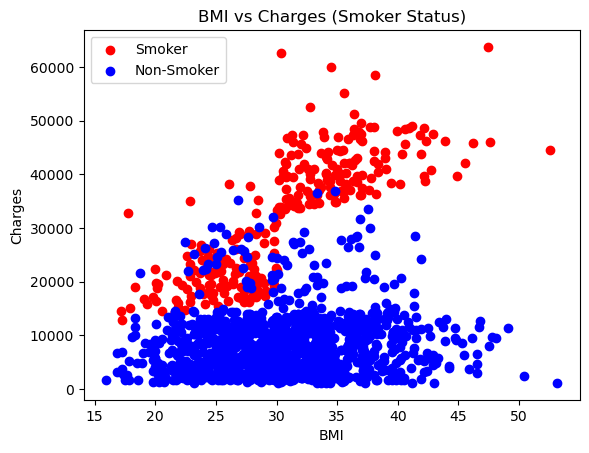

In [103]:
plt.scatter(df[df['smoker'] == 'yes']['bmi'], df[df['smoker'] == 'yes']['charges'], color='red', label='Smoker')
plt.scatter(df[df['smoker'] == 'no']['bmi'], df[df['smoker'] == 'no']['charges'], color='blue', label='Non-Smoker')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges (Smoker Status)')
plt.legend()
plt.show()

Age vs Charges by Smoker Status

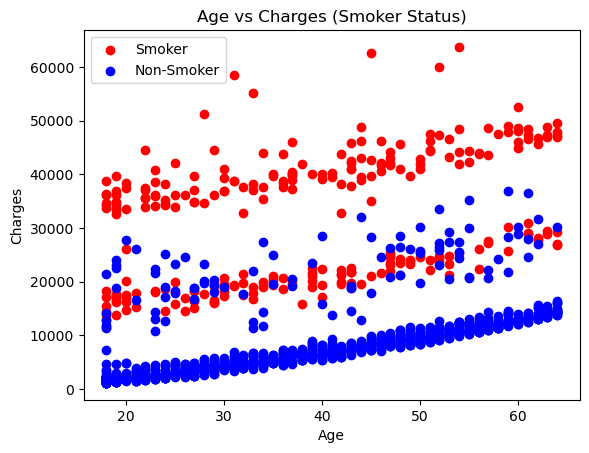

In [104]:
plt.scatter(df[df['smoker'] == 'yes']['age'], df[df['smoker'] == 'yes']['charges'], color='red', label='Smoker')
plt.scatter(df[df['smoker'] == 'no']['age'], df[df['smoker'] == 'no']['charges'], color='blue', label='Non-Smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges (Smoker Status)')
plt.legend()
plt.show()

BMI vs Charges by Sex

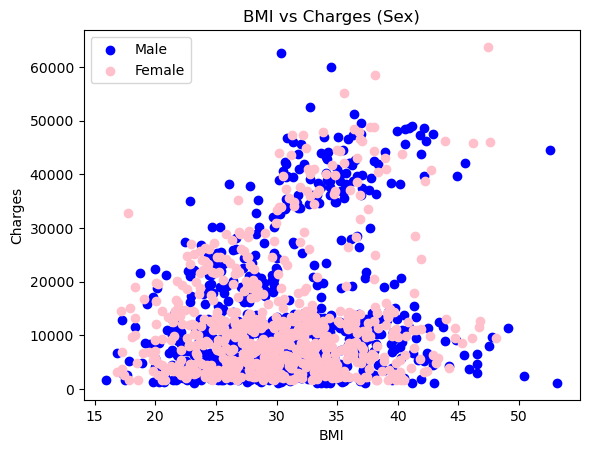

In [105]:
plt.scatter(df[df['sex'] == 'male']['bmi'], df[df['sex'] == 'male']['charges'], color='blue', label='Male')
plt.scatter(df[df['sex'] == 'female']['bmi'], df[df['sex'] == 'female']['charges'], color='pink', label='Female')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges (Sex)')
plt.legend()
plt.show()

Age vs Charges by Sex

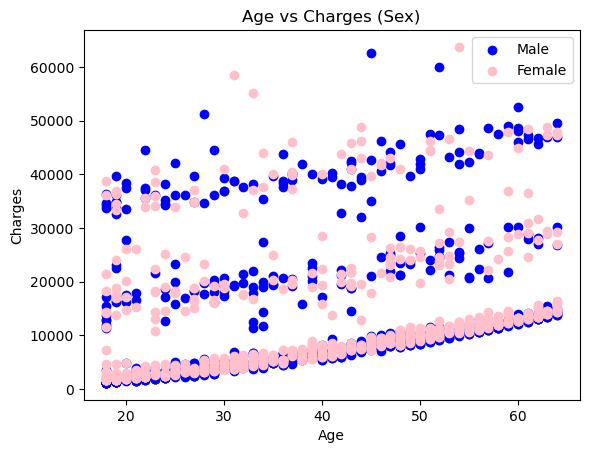

In [110]:
plt.scatter(df[df['sex'] == 'male']['age'], df[df['sex'] == 'male']['charges'], color='blue', label='Male')
plt.scatter(df[df['sex'] == 'female']['age'], df[df['sex'] == 'female']['charges'], color='pink', label='Female')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges (Sex)')
plt.legend()
plt.show()

### 5. Correlation Heatmap

In [112]:
corr = df.corr(numeric_only=True)
corr

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


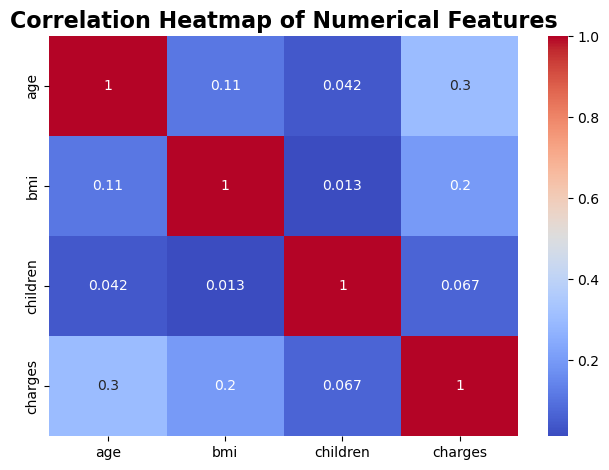

In [120]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 6. Pairwise Relationships (Pairplots)

In [125]:
numerical_cols = ['age', 'bmi', 'children', 'charges']


Pairplot by smoker

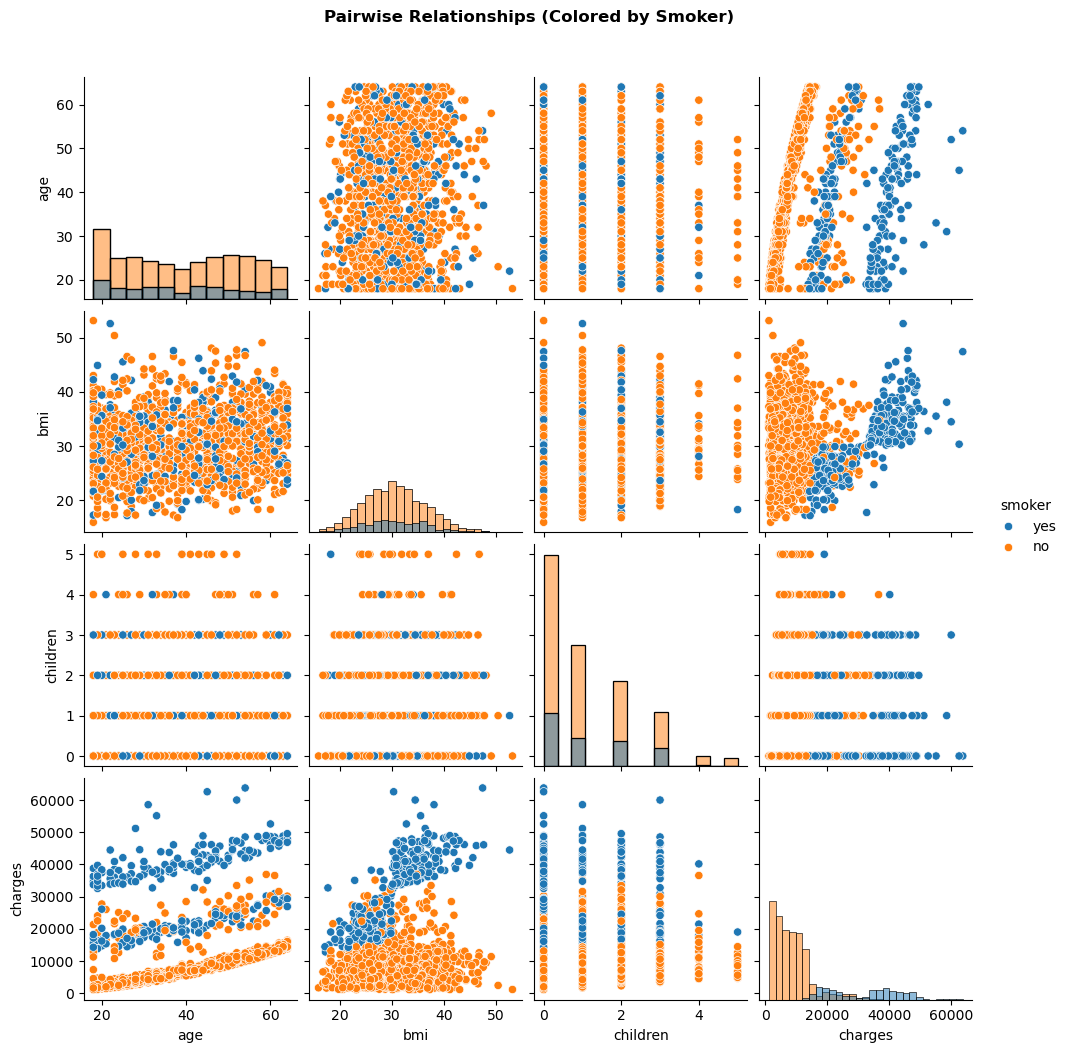

In [132]:
sns.pairplot(df[numerical_cols + ['smoker']], hue='smoker', diag_kind='hist')
plt.suptitle('Pairwise Relationships (Colored by Smoker)', y=1.05, fontweight='bold')
plt.show()

Pairplot by sex

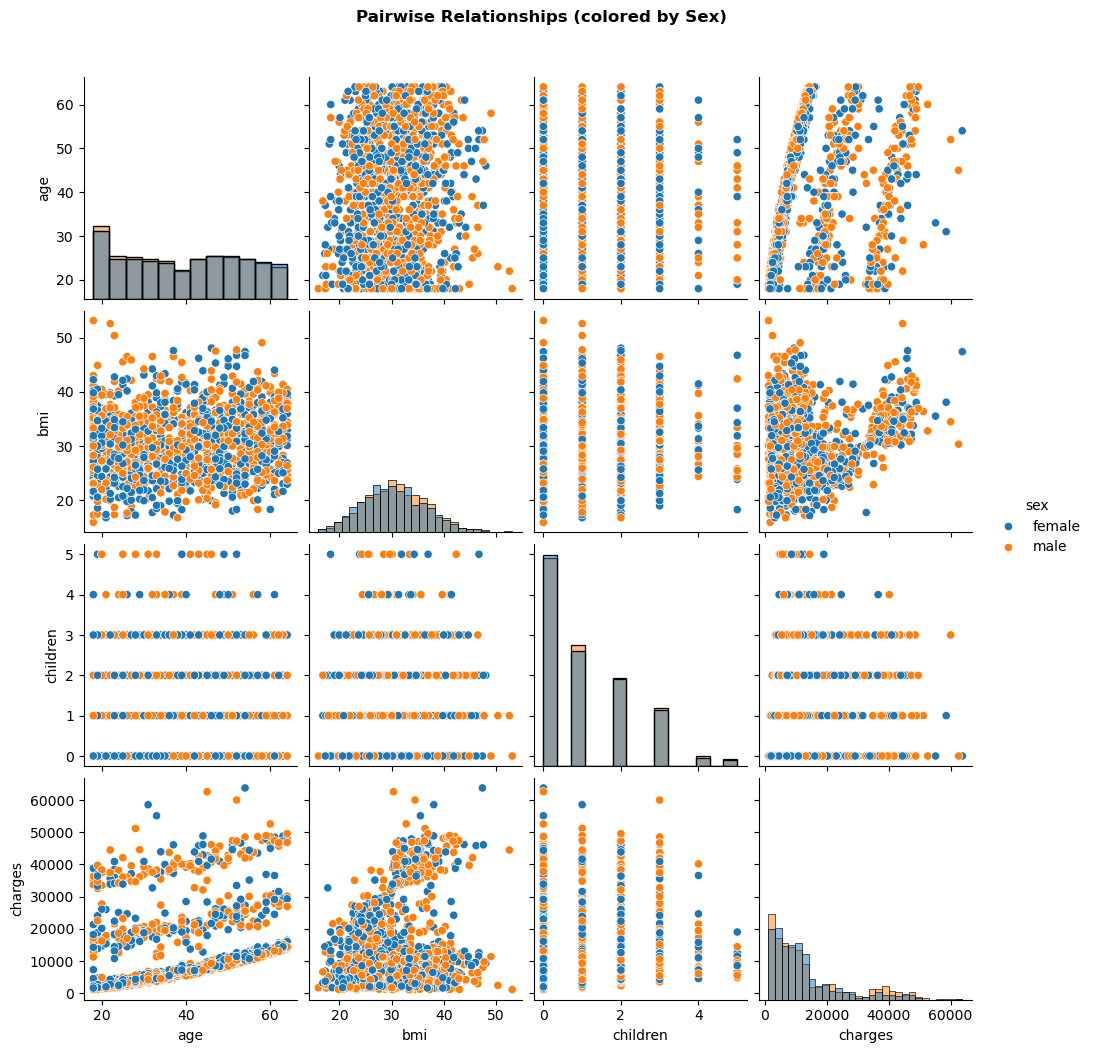

In [134]:
sns.pairplot(df[numerical_cols + ['sex']], hue='sex', diag_kind='hist')
plt.suptitle('Pairwise Relationships (colored by Sex)', y=1.05, fontweight='bold')
plt.show()